In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('job_cleanData.csv')

In [4]:
df = df.set_index('job_ID')

In [5]:
df.head()

,designation,company_id,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,job_details,details_id,industry,level,City,State
job_ID,,,,,,,,,,,,,,
3471657636,Data Analyst,524.0,Crossover,Remote,Full-time,1001,200,5.395547e+06,About the job Crossover is the world's #1 sour...,2697,IT Services and IT Consulting,Associate,Delhi,Delhi
3471669068,Data Analyst,524.0,Crossover,Remote,Full-time,1001,184,5.395547e+06,About the job Crossover is the world's #1 sour...,2724,IT Services and IT Consulting,Associate,New Delhi,Delhi
3474349934,Data Analyst,2242.0,Uplers,Remote,Full-time,1001,200,9.821152e+05,About the job Profile: ML EngineersExperience:...,3668,IT Services and IT Consulting,Mid-Senior level,Greater Bengaluru Area,Karnataka
3472816027,Data Analyst,1553.0,PVAR SERVICES,On-site,Full-time,1,200,2.094000e+03,About the job Designation: Data AnalystLocatio...,3083,Not Avilable,Not Avilable,Gurugram,Haryana
3473311511,Data Analyst,2147.0,Timeline Freight Brokers,On-site,Full-time,1,8,9.821152e+05,About the job The ideal candidate will use the...,3359,Not Avilable,Not Avilable,Mohali district,North West


In [6]:
df.isnull().sum()

designation           0
company_id            0
name                  0
work_type             0
involvement           0
employees_count       0
total_applicants      0
linkedin_followers    0
job_details           0
details_id            0
industry              0
level                 0
City                  0
State                 0
dtype: int64

In [7]:
df['company_id'].unique().size

2321

In [8]:
df['details_id'].is_unique

True

# Which industry has the highest number of remote jobs?

In [9]:
df = df.replace({'Not Avilable': 'Other'})

In [10]:
pd.DataFrame(df[df['work_type'] == 'Remote'].groupby('industry')['industry'].value_counts().sort_values(ascending=False)).rename(columns={'count': 'remote_jobs'})

,remote_jobs
industry,
IT Services and IT Consulting,1755
Other,399
Software Development,41
Technology Information and Internet,29
Information Technology & Services,21
Staffing and Recruiting,14
Financial Services,11
Information Services,5
Business Consulting and Services,5


# Which state has the lowest number of on-site jobs?

In [11]:
pd.DataFrame(df[df['work_type'] == 'On-site'].groupby('State')['work_type'].count().sort_values(ascending=False)).rename(columns={'work_type': 'count'})

,count
State,
Karnataka,523
Maharashtra,390
Delhi,250
Telangana,243
Tamil Nadu,225
Haryana,219
Uttar Pradesh,167
Gujarat,110
Kerala,39


# What is the most common designation for part-time jobs?

In [12]:
pd.DataFrame(df[df['involvement'] == 'Part-time'].groupby('designation')['designation'].value_counts().sort_values(ascending=False)).rename(columns={'designation': 'count'})

,count
designation,
Other,9
Other Developer,6
Data Analyst,3
Education and Counseling,3
Internships,2
PowerApps Developer,1
Web Developer,1
Technical Trainer/Writer/Owner,1
Snowflake Developer,1


In [13]:
# another solution
df[df['involvement'] == 'Part-time']['designation'].mode()

0    Other
Name: designation, dtype: object

# How many job titles have more than 10,000 LinkedIn followers?

In [14]:
df[df['linkedin_followers'] > 10000].groupby('designation').ngroups

81

In [15]:
# another solution
len(df[df['linkedin_followers'] > 10000]['designation'].value_counts())


81

# Which city has the highest diversity of industries?

In [16]:
pd.DataFrame(df.groupby('City')['industry'].nunique().sort_values(ascending=False)).rename(columns={'industry': 'industry_count'})

,industry_count
City,
Bengaluru,57
Mumbai,36
Gurugram,32
Hyderabad,29
Chennai,26
...,...
Jodhpur,1
Jamshedpur,1
Jalgaon,1


# What is the most frequent word in the job details column?

In [60]:
from collections import Counter

job_details = ' '.join(df['job_details'])
words = job_details.split(' ')
Counter(words).most_common(5)

[('and', 87952), ('to', 55731), ('the', 42429), ('of', 39140), ('a', 33659)]

# How would you group the data set by work type and level and calculate the mean number of applicants for each group?

In [72]:
pd.DataFrame(df.groupby(by=['work_type', 'level'])['total_applicants'].mean()).rename(columns={'total_applicants': 'mean'})

mean
work_type level                       
Hybrid     Associate         55.821429
           Director          45.166667
           Entry level       44.812500
           Executive         57.818182
           Mid-Senior level  45.330709
          Other              18.037175
On-site    Associate         55.958333
           Director          44.500000
           Entry level       49.907692
           Executive         52.476190
           Internship        68.000000
           Mid-Senior level  44.405024
          Other              15.089725
Remote     Associate         66.263889
           Director           5.875000
           Entry level       48.233333
           Executive          2.000000
           Internship        50.000000
           Mid-Senior level   8.989368
          Other              23.427184

# Filter the data set to only include jobs that have “data” or “analyst” in their designation

In [148]:
(df[df['designation'].str.contains('data|analyst',case = False)])

,job_ID,designation,company_id,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,job_details,details_id,industry,level,City,State
0,3471657636,Data Analyst,524.0,Crossover,Remote,Full-time,1001,200,5.395547e+06,About the job Crossover is the world's #1 sour...,2697,IT Services and IT Consulting,Associate,Delhi,Delhi
1,3471669068,Data Analyst,524.0,Crossover,Remote,Full-time,1001,184,5.395547e+06,About the job Crossover is the world's #1 sour...,2724,IT Services and IT Consulting,Associate,New Delhi,Delhi
2,3474349934,Data Analyst,2242.0,Uplers,Remote,Full-time,1001,200,9.821152e+05,About the job Profile: ML EngineersExperience:...,3668,IT Services and IT Consulting,Mid-Senior level,Greater Bengaluru Area,Karnataka
3,3472816027,Data Analyst,1553.0,PVAR SERVICES,On-site,Full-time,1,200,2.094000e+03,About the job Designation: Data AnalystLocatio...,3083,Other,Other,Gurugram,Haryana
4,3473311511,Data Analyst,2147.0,Timeline Freight Brokers,On-site,Full-time,1,8,9.821152e+05,About the job The ideal candidate will use the...,3359,Other,Other,Mohali district,North West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,3464523737,Data Analyst,2050.0,Tata Consultancy Services,On-site,Full-time,10001,31,9.821152e+05,About the job Greetings from TATA Consultancy ...,650,IT Services and IT Consulting,Other,Kochi,Kerala
5542,3464567471,Data Analyst,2050.0,Tata Consultancy Services,Hybrid,Full-time,10001,47,1.192355e+07,About the job Role: Ab-Initio ETL DeveloperReq...,795,IT Services and IT Consulting,Mid-Senior level,Pune,Maharashtra
5563,3464571288,Data Analyst,1199.0,LTIMindtree,Hybrid,Full-time,10001,60,9.821152e+05,About the job Should have good knowledge on Ta...,811,IT Services and IT Consulting,Mid-Senior level,Pune,Maharashtra
5565,3473097995,Data Analyst,1002.0,IQVIA India,On-site,Full-time,10001,200,1.297030e+05,About the job Skill Set: Bigdata Developer Job...,3315,Hospitals and Health Care,Associate,Bangalore Urban,Karnataka


# How many jobs are there by state? (Bar plot)

In [236]:
import matplotlib.pyplot as plt

no_of_jobs = df.groupby('State')['designation'].apply(len)
d = pd.DataFrame(no_of_jobs.sort_values(ascending=False)).reset_index()

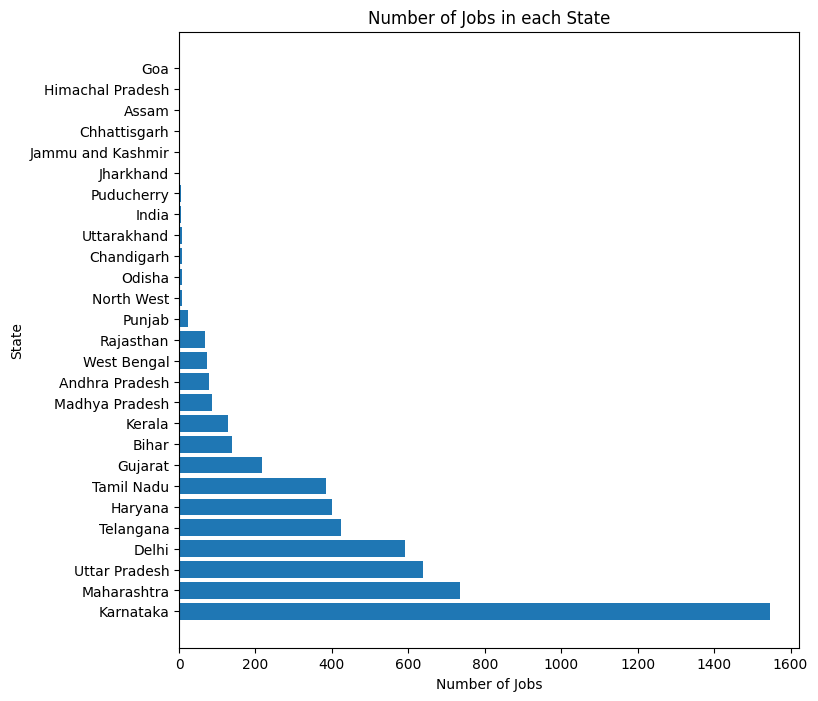

In [235]:
plt.figure(figsize=(8, 8))
plt.title('Number of Jobs in each State')
plt.xlabel('Number of Jobs')
plt.ylabel('State')
plt.barh(d['State'], d['designation'])
plt.show()